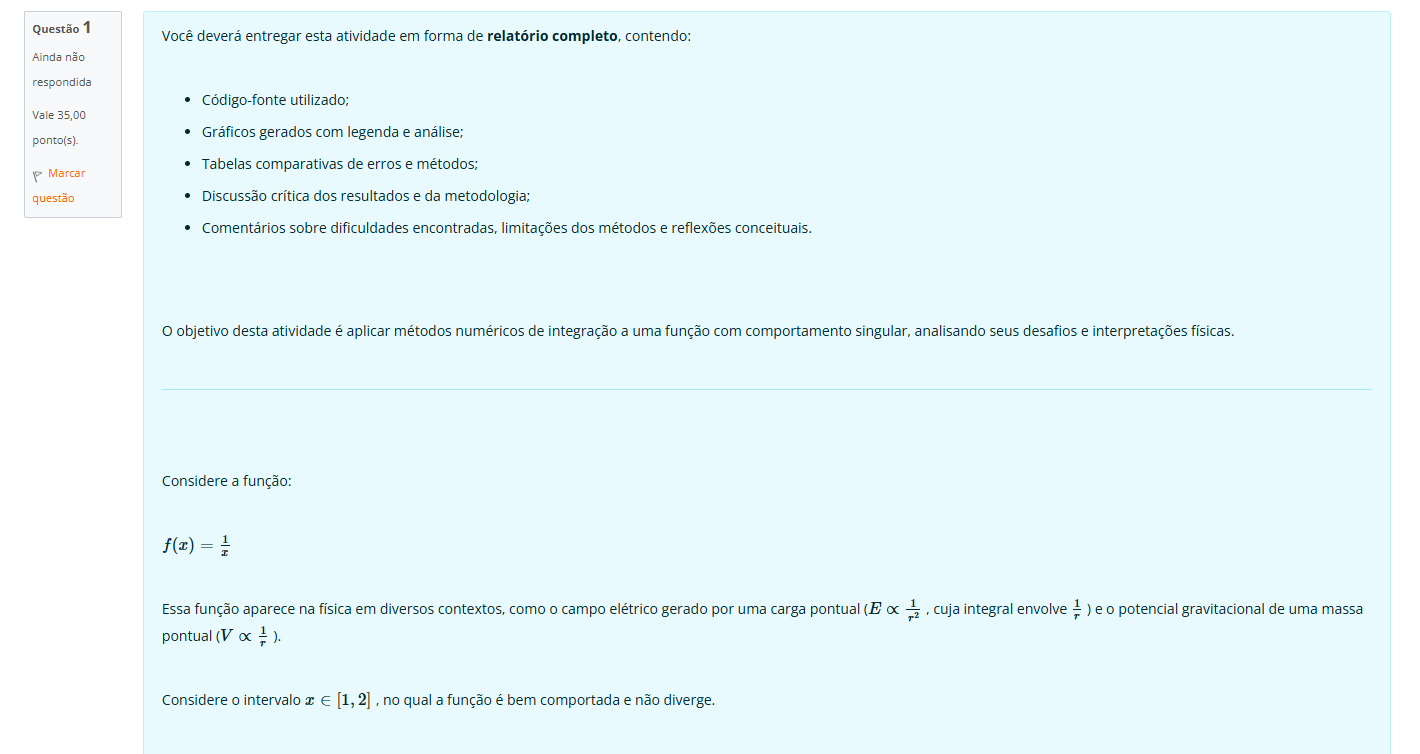

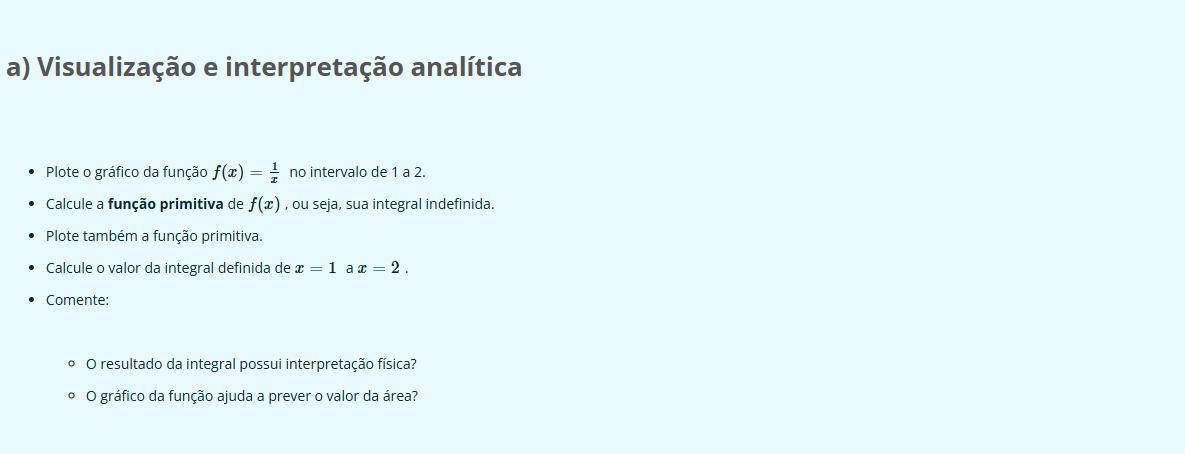

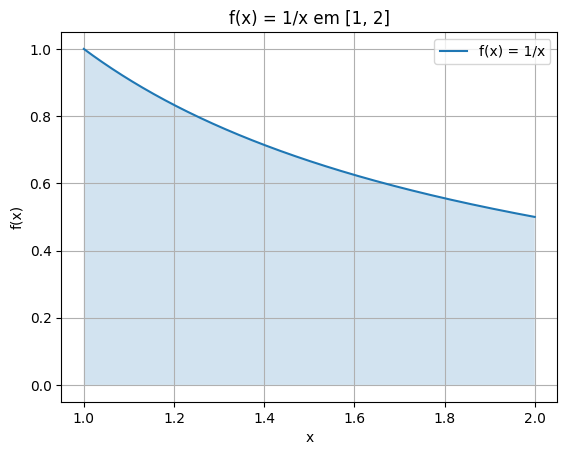

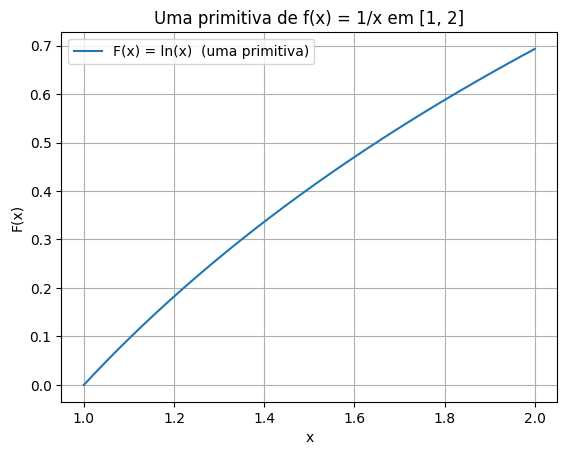

np.float64(0.6931471805599453)

In [1]:
# Visualiza√ß√£o e c√°lculos para f(x) = 1/x no intervalo [1, 2]

import numpy as np
import matplotlib.pyplot as plt

# Dom√≠nio
x = np.linspace(1, 2, 400)
f = 1/x

# 1) Plot de f(x) = 1/x em [1, 2] com √°rea sombreada da integral
plt.figure()
plt.plot(x, f, label="f(x) = 1/x")
plt.fill_between(x, f, where=(x>=1) & (x<=2), alpha=0.2)
plt.title("f(x) = 1/x em [1, 2]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# 2) Fun√ß√£o primitiva (integral indefinida): F(x) = ln|x| + C
# Vamos escolher a constante C = 0 para visualizar: F(x) = ln x em x>0
F = np.log(x)

plt.figure()
plt.plot(x, F, label="F(x) = ln(x)  (uma primitiva)")
plt.title("Uma primitiva de f(x) = 1/x em [1, 2]")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.show()

# 3) Integral definida de 1 a 2
integral_1_2 = np.log(2)

integral_1_2



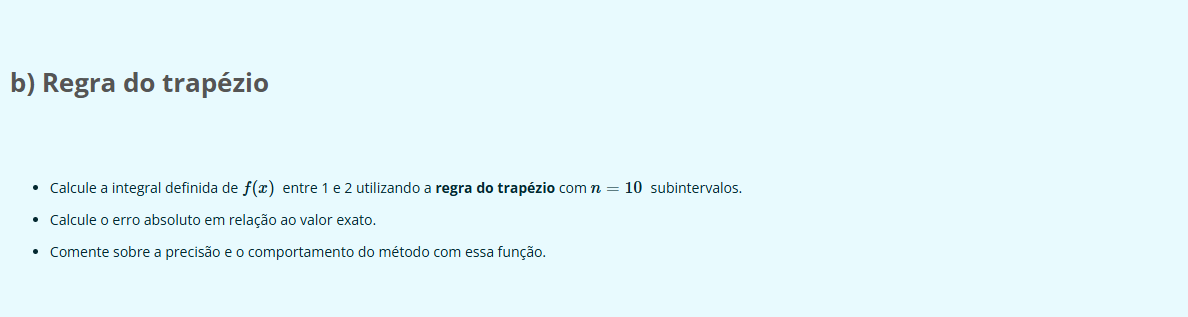

Regra do Trap√©zio (n=10) para f(x)=1/x em [1,2]
Passo h = 0.1
Aproxima√ß√£o T_10 = 0.693771403175428
Valor exato     = 0.693147180559945  (ln 2)
Erro absoluto   = 6.242226154826724e-04


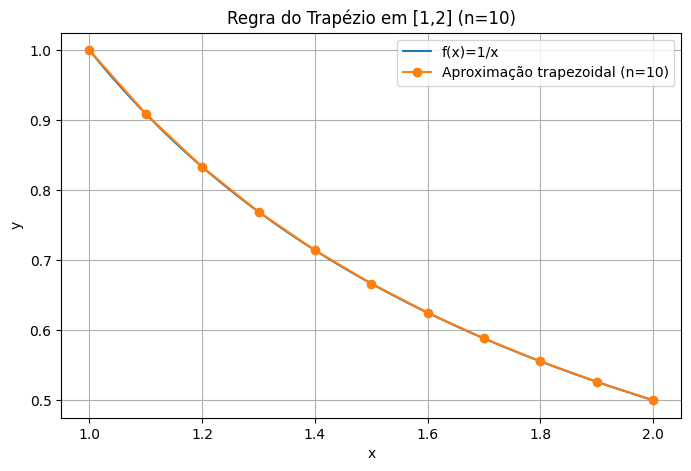

In [2]:
# Parte B ‚Äî Regra do Trap√©zio para f(x)=1/x em [1,2] com n=10

import numpy as np
import matplotlib.pyplot as plt
from math import log

# ---- dados do problema ----
def f(x):
    return 1.0/np.array(x, dtype=float)

a, b = 1.0, 2.0
n = 10
h = (b - a) / n

# ---- n√≥s e valores ----
x = np.linspace(a, b, n + 1)
y = f(x)

# ---- regra do trap√©zio composta ----
T = h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

# ---- valor exato e erro ----
I_exato = log(2.0)
erro_abs = abs(I_exato - T)

# ---- sa√≠da num√©rica ----
print("Regra do Trap√©zio (n=10) para f(x)=1/x em [1,2]")
print(f"Passo h = {h}")
print(f"Aproxima√ß√£o T_10 = {T:.15f}")
print(f"Valor exato     = {I_exato:.15f}  (ln 2)")
print(f"Erro absoluto   = {erro_abs:.15e}")

# ---- gr√°fico opcional: curva + poligonal dos trap√©zios ----
xx = np.linspace(a, b, 400)
plt.figure(figsize=(8,5))
plt.plot(xx, f(xx), label='f(x)=1/x')
plt.plot(x, y, marker='o', linestyle='-', label='Aproxima√ß√£o trapezoidal (n=10)')
plt.title('Regra do Trap√©zio em [1,2] (n=10)')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True); plt.legend()
plt.show()


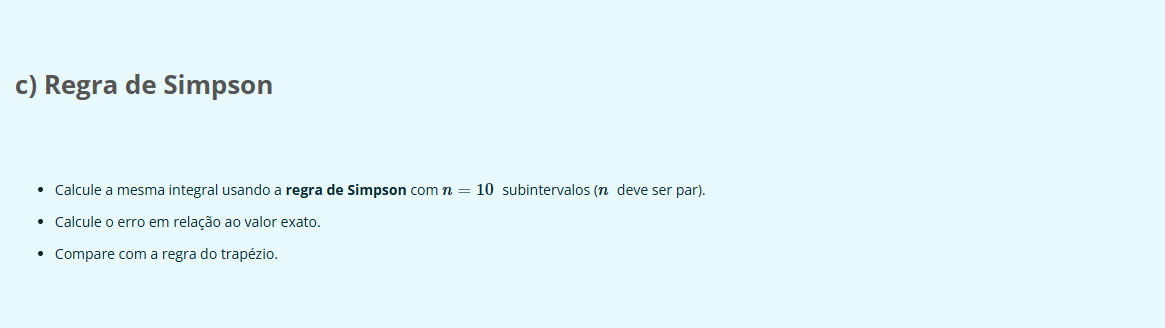

In [3]:
import numpy as np
from math import log

# Fun√ß√£o e par√¢metros
def f(x): 
    return 1.0/np.array(x, dtype=float)

a, b = 1.0, 2.0
n = 10  # precisa ser par
h = (b - a) / n
x = np.linspace(a, b, n+1)
y = f(x)

# Simpson composto
S = (h/3) * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]))

# Valor exato
I_exact = log(2.0)

# Erro absoluto
erro_abs_S = abs(I_exact - S)

S, I_exact, erro_abs_S, h


print("Regra de Simpson (n=10) para f(x)=1/x em [1,2]")
print(f"Passo h = {h}")
print(f"Aproxima√ß√£o S_10 = {S:.15f}")
print(f"Valor exato      = {I_exact:.15f}  (ln 2)")
print(f"Erro absoluto    = {erro_abs_S:.15e}")

Regra de Simpson (n=10) para f(x)=1/x em [1,2]
Passo h = 0.1
Aproxima√ß√£o S_10 = 0.693150230688930
Valor exato      = 0.693147180559945  (ln 2)
Erro absoluto    = 3.050128985049305e-06


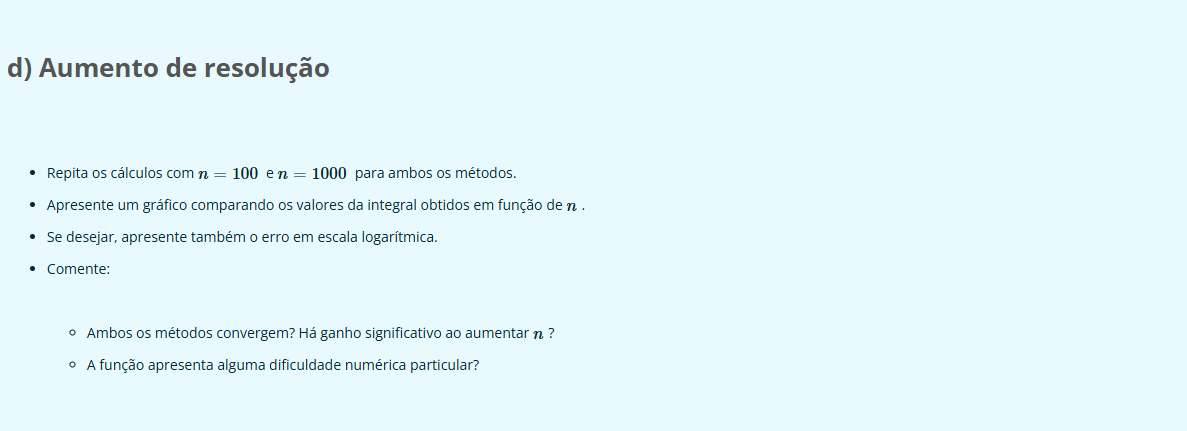

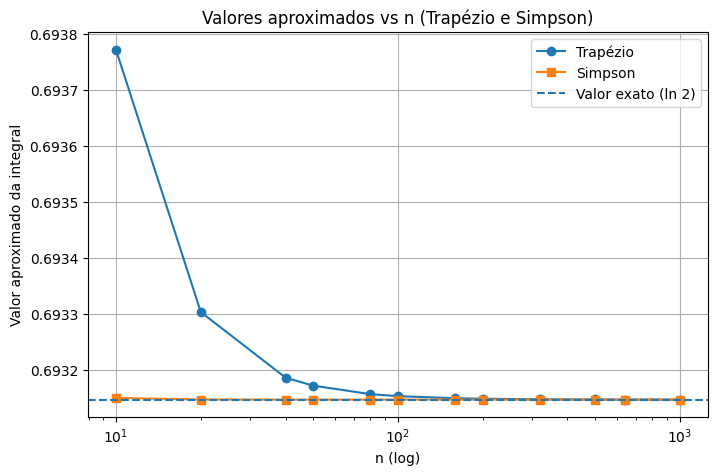

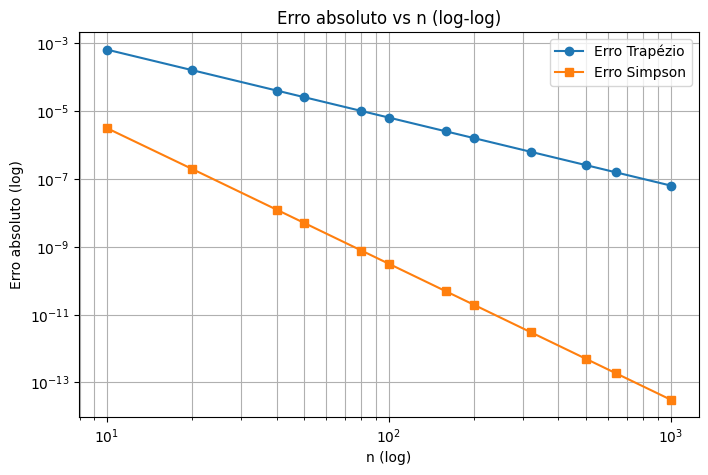

       n  Trap√©zio  Erro Trap√©zio   Simpson  Erro Simpson
0     10  0.693771   6.242226e-04  0.693150  3.050129e-06
1     20  0.693303   1.562012e-04  0.693147  1.941052e-07
2     40  0.693186   3.905945e-05  0.693147  1.218801e-08
3     50  0.693172   2.499875e-05  0.693147  4.995009e-09
4     80  0.693157   9.765434e-06  0.693147  7.626416e-10
5    100  0.693153   6.249922e-06  0.693147  3.124219e-10
6    160  0.693150   2.441394e-06  0.693147  4.767908e-11
7    200  0.693149   1.562495e-06  0.693147  1.952993e-11
8    320  0.693148   6.103508e-07  0.693147  2.980283e-12
9    500  0.693147   2.499999e-07  0.693147  5.001555e-13
10   640  0.693147   1.525878e-07  0.693147  1.862954e-13
11  1000  0.693147   6.249999e-08  0.693147  3.130829e-14


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log

# Fun√ß√£o alvo
def f(x):
    return 1.0/np.array(x, dtype=float)

# Integral exata
I_exact = log(2.0)

# M√©todos num√©ricos
def trapezio(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

def simpson(f, a, b, n):
    # n deve ser par
    if n % 2 != 0:
        raise ValueError("n deve ser par para Simpson")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h/3) * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]))

a, b = 1.0, 2.0

# Lista de n: inclui explicitamente 100 e 1000 e alguns intermedi√°rios para um gr√°fico mais informativo
n_values = [10, 20, 40, 50, 80, 100, 160, 200, 320, 500, 640, 1000]
n_values = sorted(list(dict.fromkeys([n for n in n_values if n > 0])))

# C√°lculos
rows = []
for n in n_values:
    Tn = trapezio(f, a, b, n)
    Sn = simpson(f, a, b, n if n % 2 == 0 else n+1)  # garantir par; por√©m nossa lista j√° √© par
    errT = abs(I_exact - Tn)
    errS = abs(I_exact - Sn)
    rows.append({"n": n, "Trap√©zio": Tn, "Erro Trap√©zio": errT, "Simpson": Sn, "Erro Simpson": errS})

df = pd.DataFrame(rows)

# Tabela filtrada para n=100 e n=1000
df_100_1000 = df[df["n"].isin([100, 1000])].copy()

# Exibir tabelas ao usu√°rio

# Gr√°fico 1: valores das integrais vs n (eixo x log)
plt.figure(figsize=(8,5))
plt.plot(df["n"], df["Trap√©zio"], marker='o', label='Trap√©zio')
plt.plot(df["n"], df["Simpson"], marker='s', label='Simpson')
plt.axhline(I_exact, linestyle='--', label='Valor exato (ln 2)')
plt.xscale('log')
plt.xlabel('n (log)')
plt.ylabel('Valor aproximado da integral')
plt.title('Valores aproximados vs n (Trap√©zio e Simpson)')
plt.grid(True)
plt.legend()
plt.show()

# Gr√°fico 2: erro absoluto vs n em escala log-log
plt.figure(figsize=(8,5))
plt.plot(df["n"], df["Erro Trap√©zio"], marker='o', label='Erro Trap√©zio')
plt.plot(df["n"], df["Erro Simpson"], marker='s', label='Erro Simpson')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (log)')
plt.ylabel('Erro absoluto (log)')
plt.title('Erro absoluto vs n (log-log)')
plt.grid(True, which='both')
plt.legend()
plt.show()

df, df_100_1000

print(df)



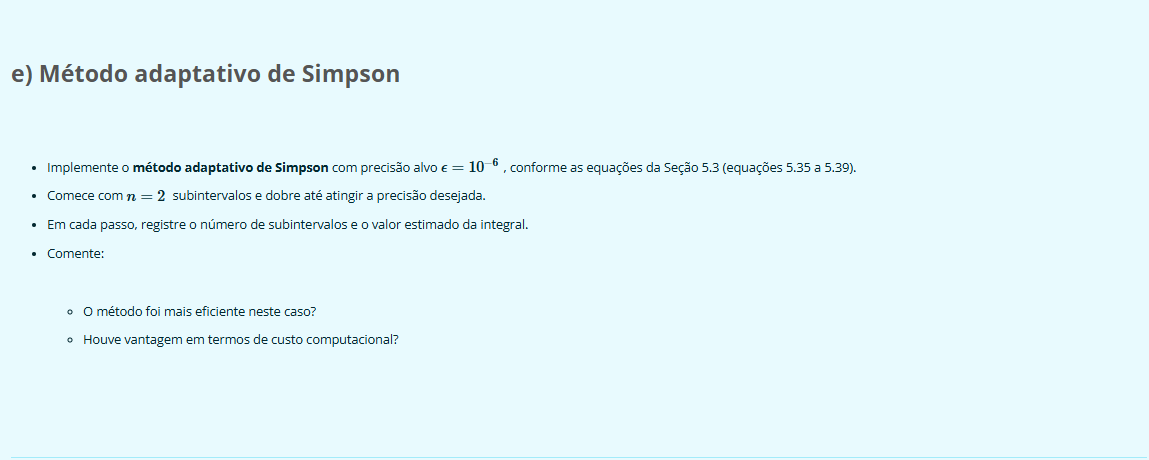

In [8]:
import numpy as np
from math import log

# Fun√ß√£o e limites
f = lambda x: 1/x
a, b = 1.0, 2.0

# Toler√¢ncia e registro
eps = 1e-6
records = []  # (n, S_n, est_erro)

def composite_simpson(f, a, b, n):
    """Simpson composto com n par."""
    if n % 2 != 0:
        raise ValueError("n deve ser par para Simpson.")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    # y[1:-1:2] = √≠mpares; y[2:-1:2] = pares (at√© n-2)
    S = (h/3) * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))
    return S

# Itera√ß√£o com n come√ßando em 2 e dobrando
n = 2
S_n = composite_simpson(f, a, b, n)
records.append((n, S_n, None))  # sem estimativa no primeiro passo

while True:
    n2 = 2 * n
    S_2n = composite_simpson(f, a, b, n2)
    est_erro = abs(S_2n - S_n) / 15.0  # Eq. (5.39)
    records.append((n2, S_2n, est_erro))
    if est_erro < eps:
        break
    n, S_n = n2, S_2n

# Impress√£o dos resultados
print("n    S_n                 Est_erro")
for n, S, e in records:
    if e is None:
        print(f"{n:<4d} {S:.12f}     {'‚Äî':>10}")
    else:
        print(f"{n:<4d} {S:.12f}     {e:.3e}")

# (Opcional) estat√≠sticas
total_evals = sum(n + 1 for n, _, _ in records)  # sem reuso de pontos
print(f"\nTotal de avalia√ß√µes de f(x) (sem reuso): {total_evals}")
print(f"Valor exato ln 2 = {log(2.0):.12f}")


n    S_n                 Est_erro
2    0.694444444444              ‚Äî
4    0.693253968254     7.937e-05
8    0.693154530655     6.629e-06
16   0.693147652819     4.585e-07

Total de avalia√ß√µes de f(x) (sem reuso): 34
Valor exato ln 2 = 0.693147180560


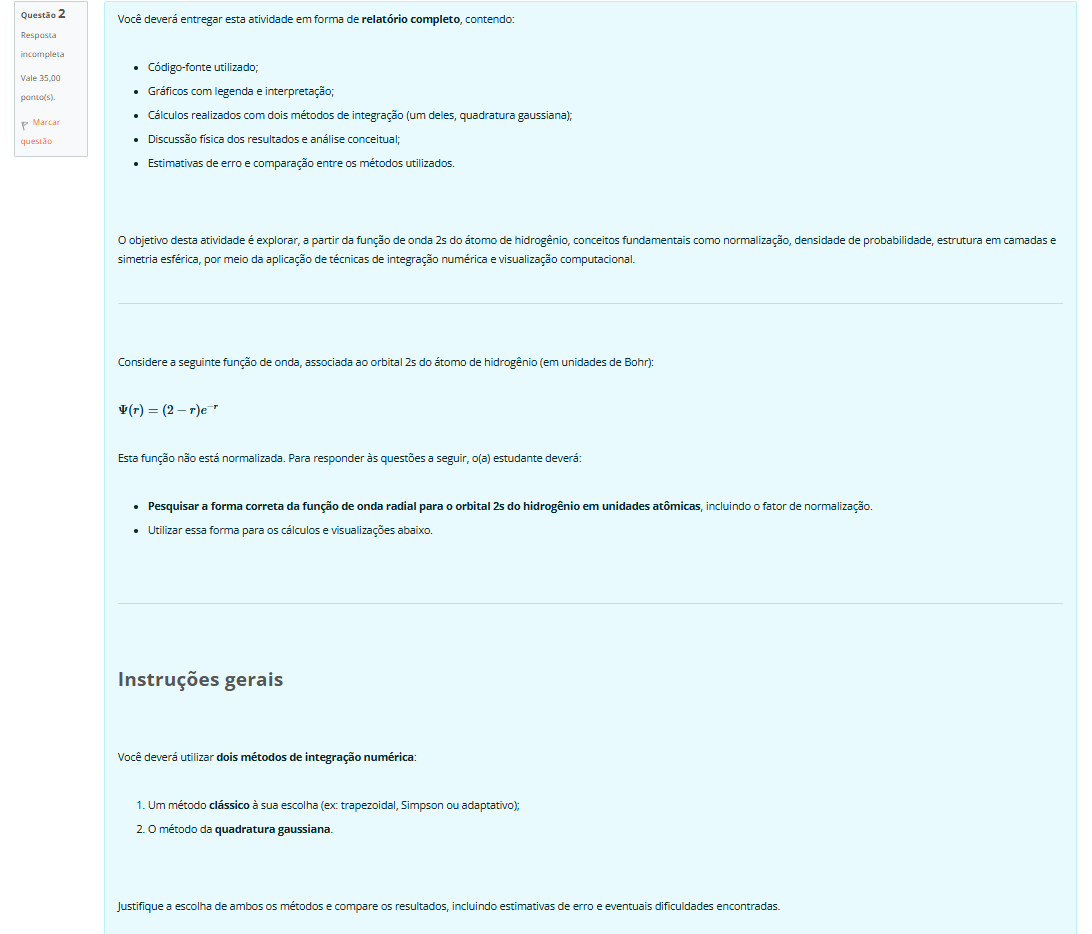

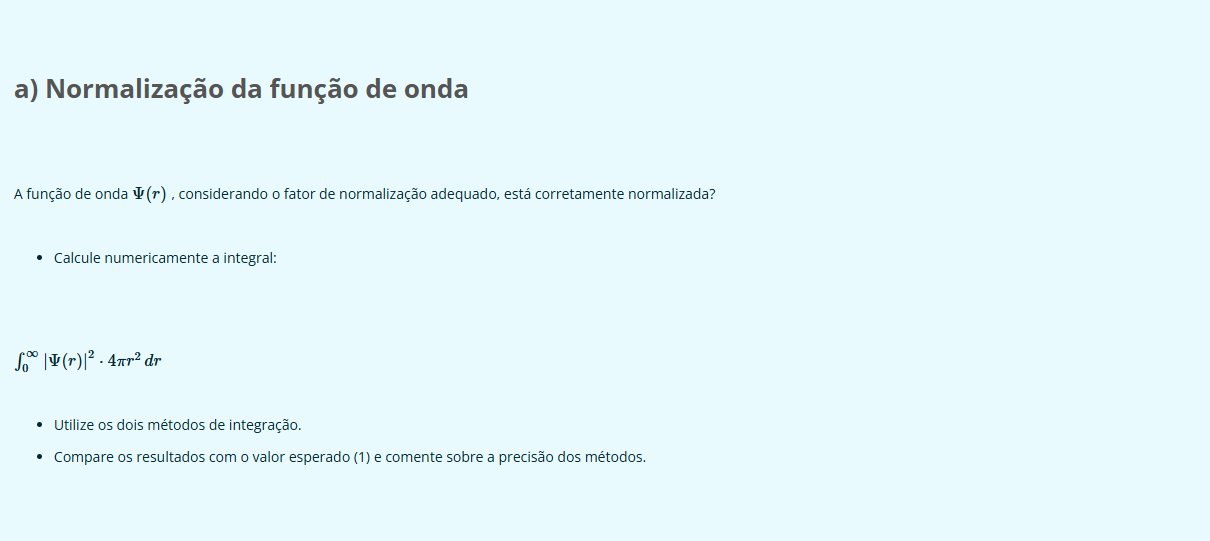

Resultados da normaliza√ß√£o do 2s (H)
Trap√©zio           : 0.9999999999986166
Simpson            : 0.9999999999999390
Gauss‚ÄìLaguerre n=3 : 0.9999999999999998


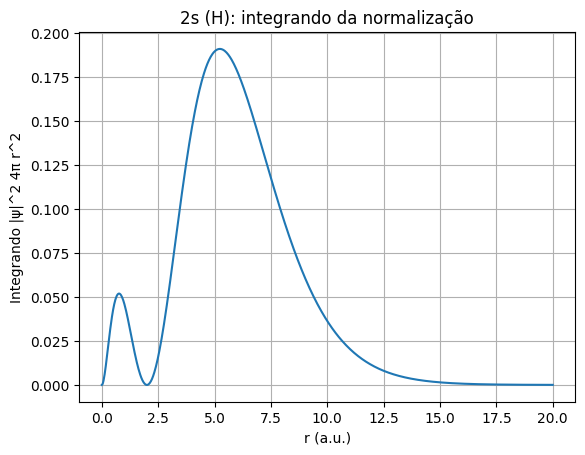

In [10]:
# Script: normalizacao_2s_hidrogenio.py
# C√°lculo de normaliza√ß√£o do orbital 2s do hidrog√™nio (unidades at√¥micas)
# M√©todos: Trap√©zio, Simpson e Gauss‚ÄìLaguerre
# Autor: ChatGPT

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.laguerre import laggauss

# ---------------------------
# Fun√ß√£o de onda 2s (normalizada) e integrando
# ---------------------------
def integrando(r):
    """
    Integrando da normaliza√ß√£o: |psi(r)|^2 * 4œÄ r^2
    para o orbital 2s do hidrog√™nio (a.u.).
    """
    return 0.125 * (2.0 - r)**2 * (r**2) * np.exp(-r)

# ---------------------------
# M√©todos de integra√ß√£o
# ---------------------------
def trapezio_composto(f, a, b, n):
    """M√©todo do trap√©zio composto."""
    x = np.linspace(a, b, n + 1)
    y = f(x)
    h = (b - a) / n
    return h * (0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1])

def simpson_composto(f, a, b, n):
    """M√©todo de Simpson composto (n deve ser par)."""
    if n % 2 == 1:
        n += 1
    x = np.linspace(a, b, n + 1)
    y = f(x)
    h = (b - a) / n
    S = y[0] + y[-1] + 4.0*np.sum(y[1:-1:2]) + 2.0*np.sum(y[2:-2:2])
    return S * h / 3.0

def gauss_laguerre(f_poly, n):
    """
    M√©todo de Gauss‚ÄìLaguerre para integrais do tipo ‚à´ e^{-x} f(x) dx.
    f_poly √© a parte polinomial do integrando (sem o e^{-x}).
    """
    x, w = laggauss(n)
    return np.dot(w, f_poly(x))

# Parte polinomial do integrando (sem o e^{-r})
def f_pol(r):
    return 0.125*(2.0 - r)**2 * (r**2)

# ---------------------------
# Execu√ß√£o principal
# ---------------------------
if __name__ == "__main__":
    Rmax = 40.0

    # Trap√©zio e Simpson
    val_trap = trapezio_composto(integrando, 0.0, Rmax, 32000)
    val_simp = simpson_composto(integrando, 0.0, Rmax, 16000)

    # Gauss‚ÄìLaguerre (n=3)
    val_gl3  = gauss_laguerre(f_pol, 3)

    print("Resultados da normaliza√ß√£o do 2s (H)")
    print(f"Trap√©zio           : {val_trap:.16f}")
    print(f"Simpson            : {val_simp:.16f}")
    print(f"Gauss‚ÄìLaguerre n=3 : {val_gl3:.16f}")

    # Plot do integrando
    r = np.linspace(0, 20, 800)
    plt.figure()
    plt.plot(r, integrando(r))
    plt.xlabel("r (a.u.)")
    plt.ylabel("Integrando |œà|^2 4œÄ r^2")
    plt.title("2s (H): integrando da normaliza√ß√£o")
    plt.grid(True)
    plt.show()


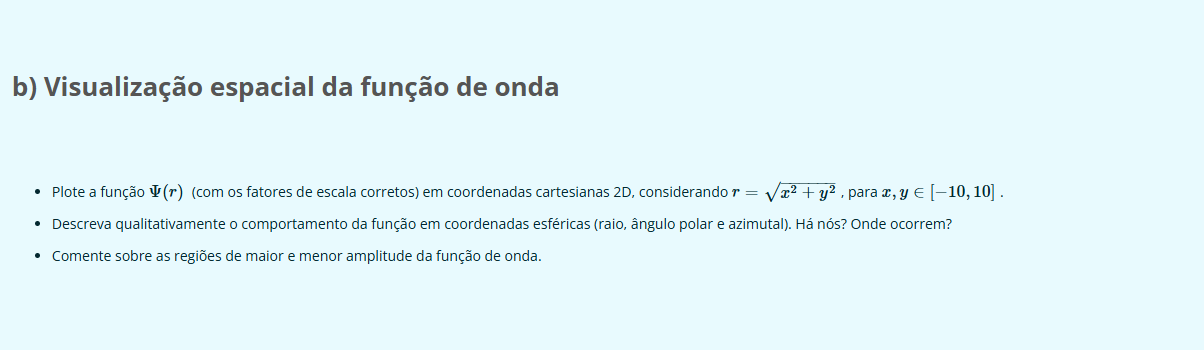

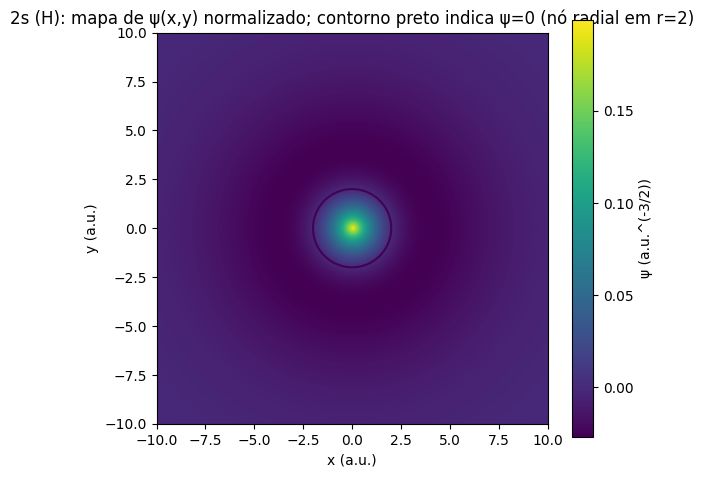

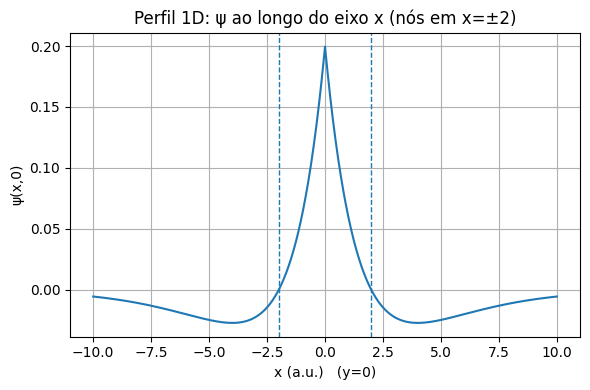

In [9]:
# Visualiza√ß√£o 2D (cartesiana) da fun√ß√£o de onda 2s do H (normalizada)
# œà(r) = R_20(r)/sqrt(4œÄ),  R_20(r) = (1/(2‚àö2)) (2 - r) e^{-r/2}
# r = sqrt(x^2 + y^2). Vamos plotar em x,y ‚àà [-10,10] a.u.
#
# Tamb√©m faremos um perfil radial (eixo x, y=0) para visualizar o n√≥ em r=2.

import numpy as np
import matplotlib.pyplot as plt

# Constantes/fun√ß√µes
inv_sqrt_4pi = 1.0/np.sqrt(4.0*np.pi)
def R20(r):
    return (1.0/(2.0*np.sqrt(2.0))) * (2.0 - r) * np.exp(-r/2.0)

def psi_2s(r):
    return R20(r) * inv_sqrt_4pi

# Grade cartesiana
L = 10.0
N = 801  # resolu√ß√£o alta para ver o n√≥ n√≠tido
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y, indexing='xy')
R = np.sqrt(X**2 + Y**2)
PSI = psi_2s(R)

# Plot 1: mapa 2D de œà(x,y) e contorno do n√≥ (œà=0) que ocorre em r=2
plt.figure(figsize=(6,5))
im = plt.imshow(PSI, origin='lower', extent=[-L, L, -L, L], aspect='equal')
plt.contour(X, Y, PSI, levels=[0.0], linewidths=1.5)
plt.xlabel("x (a.u.)")
plt.ylabel("y (a.u.)")
plt.title("2s (H): mapa de œà(x,y) normalizado; contorno preto indica œà=0 (n√≥ radial em r=2)")
plt.colorbar(im, label="œà (a.u.^(-3/2))")
plt.tight_layout()
plt.show()

# Plot 2: perfil radial (eixo x, y=0)
x_line = np.linspace(-L, L, 1601)
r_line = np.abs(x_line)
psi_line = psi_2s(r_line)

plt.figure(figsize=(6,4))
plt.plot(x_line, psi_line)
plt.axvline(2.0, linestyle='--', linewidth=1)
plt.axvline(-2.0, linestyle='--', linewidth=1)
plt.xlabel("x (a.u.)   (y=0)")
plt.ylabel("œà(x,0)")
plt.title("Perfil 1D: œà ao longo do eixo x (n√≥s em x=¬±2)")
plt.grid(True)
plt.tight_layout()
plt.show()


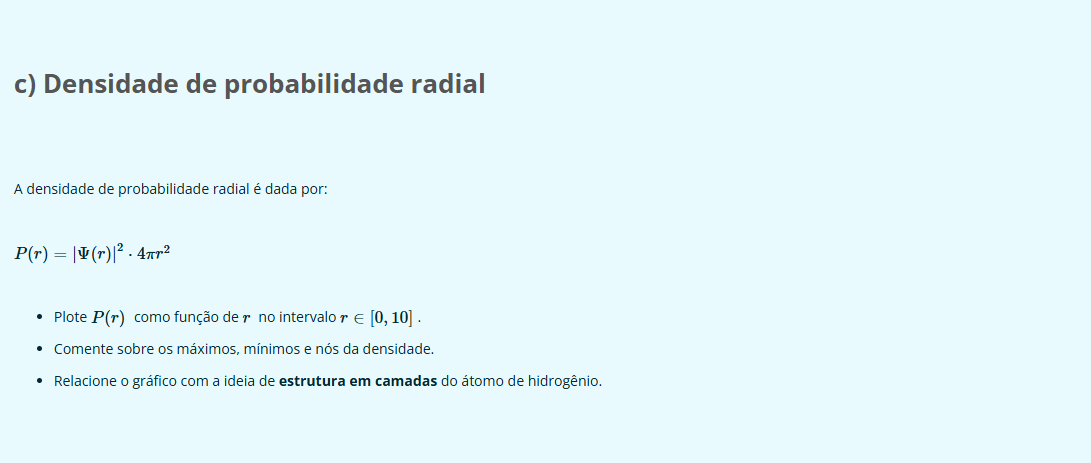

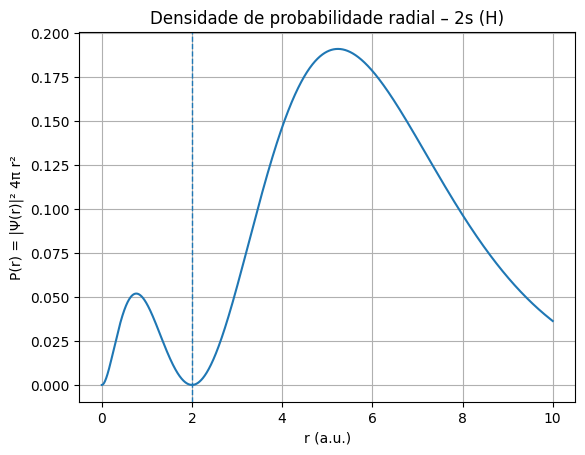

[(np.float64(0.7639321040199383), np.float64(0.051919761342284855), 'm√°ximo'),
 (np.float64(1.9999999999999973), np.float64(0.0), 'm√≠nimo'),
 (np.float64(5.236068008653115), np.float64(0.19096791082330047), 'm√°ximo')]

In [12]:
# Densidade de probabilidade radial para o 2s do hidrog√™nio
# P(r) = |Œ®(r)|^2 * 4œÄ r^2 = (1/8) (2 - r)^2 r^2 e^{-r}
# Plot em r ‚àà [0,10] e identifica√ß√£o num√©rica de m√°ximos, m√≠nimos e n√≥s.

import numpy as np
import matplotlib.pyplot as plt

def P(r):
    return 0.125 * (2.0 - r)**2 * (r**2) * np.exp(-r)

# Malha radial
r = np.linspace(0.0, 10.0, 20001)
Pr = P(r)

# N√≥(s): onde P(r)=0
# Aqui sabemos que o n√≥ radial √© em r=2 (al√©m de r=0 trivial por fator r^2, mas P(0)=0).
nodes = [2.0]

# Encontrar extremos por derivada num√©rica (diferen√ßa central) e checar mudan√ßa de sinal
dr = r[1] - r[0]
dP = np.gradient(Pr, dr)

# Pontos onde a derivada cruza zero (aproximado)
zeros = []
for i in range(1, len(r)-1):
    if dP[i-1] == 0:  # rar√≠ssimo
        zeros.append(r[i-1])
    elif dP[i] == 0:
        zeros.append(r[i])
    elif dP[i-1]*dP[i] < 0:
        # interpola√ß√£o linear para posi√ß√£o do zero
        rz = r[i-1] - dP[i-1]*(r[i]-r[i-1])/(dP[i]-dP[i-1])
        zeros.append(rz)

# Classificar extremos por segunda derivada
d2P = np.gradient(dP, dr)
extremos = []
for rz in zeros:
    # localizar √≠ndice mais pr√≥ximo
    idx = np.searchsorted(r, rz)
    if idx <= 0 or idx >= len(r)-1:
        continue
    curv = d2P[idx]
    tipo = "m√°ximo" if curv < 0 else ("m√≠nimo" if curv > 0 else "ponto de sela")
    extremos.append((rz, P(r[idx]), tipo))

# Filtrar extremos √∫nicos (toler√¢ncia)
ext_filtrados = []
for rr, pp, t in extremos:
    if len(ext_filtrados)==0 or all(abs(rr - e[0]) > 0.02 for e in ext_filtrados):
        ext_filtrados.append((rr, pp, t))

# Plot
plt.figure()
plt.plot(r, Pr)
for rr in nodes:
    plt.axvline(rr, linestyle='--', linewidth=1)
plt.xlabel("r (a.u.)")
plt.ylabel("P(r) = |Œ®(r)|¬≤ 4œÄ r¬≤")
plt.title("Densidade de probabilidade radial ‚Äì 2s (H)")
plt.grid(True)
plt.show()

# Mostrar extremos encontrados
ext_filtrados


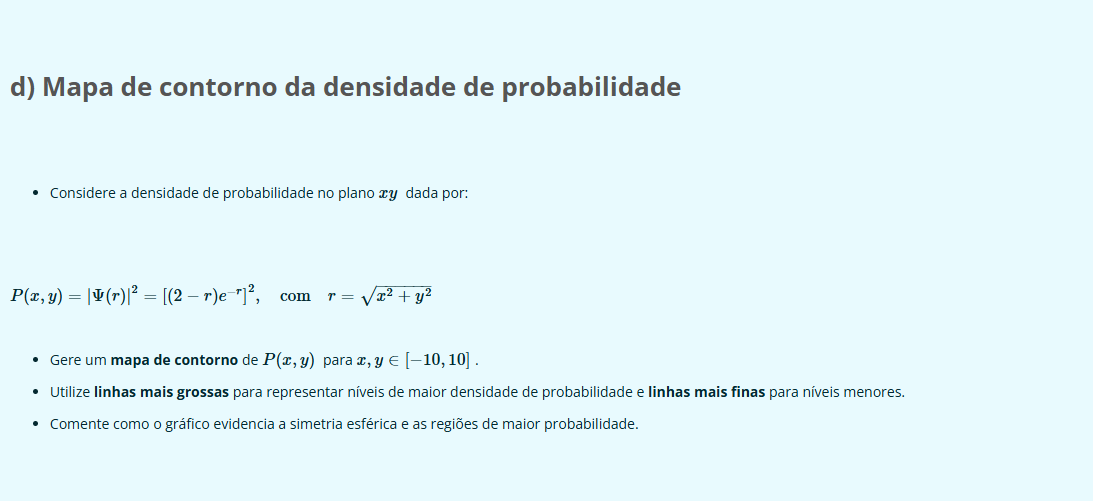

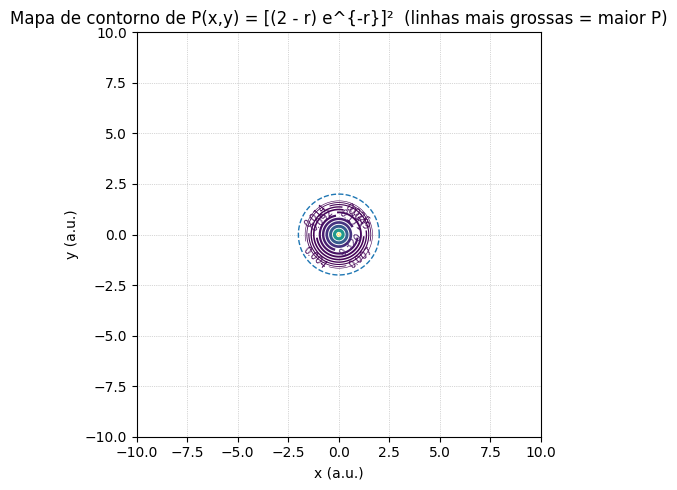

In [13]:
# Mapa de contorno de P(x,y) = [(2 - r) e^{-r}]^2, r = sqrt(x^2 + y^2)
# Dom√≠nio: x,y ‚àà [-10, 10]. Linhas mais grossas para n√≠veis maiores.

import numpy as np
import matplotlib.pyplot as plt

# Definir grade cartesiana
L = 10.0
N = 801
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y, indexing='xy')
R = np.sqrt(X**2 + Y**2)

# Densidade definida no enunciado (n√£o-normalizada, mas radialmente sim√©trica)
Pxy = ((2.0 - R) * np.exp(-R))**2  # = (2 - r)^2 e^{-2r}

# Escolher n√≠veis de contorno (maiores mais espessos)
Pmax = Pxy.max()  # deve ser 4 em r=0
# N√≠veis log-espalhados para cobrir bem a cauda
levels = np.geomspace(Pmax*1e-3, Pmax*0.98, 12)  # de ~0.004 at√© ~3.92
# Espessuras mapeadas do menor para o maior n√≠vel
lw_min, lw_max = 0.4, 2.5
lws = np.linspace(lw_min, lw_max, len(levels))

plt.figure(figsize=(6,5))
CS = plt.contour(X, Y, Pxy, levels=levels, linewidths=lws)
plt.clabel(CS, inline=True, fmt="%.3f", fontsize=7)

# Desenhar c√≠rculo do n√≥ radial (r=2), onde P=0
theta = np.linspace(0, 2*np.pi, 800)
plt.plot(2*np.cos(theta), 2*np.sin(theta), linestyle='--', linewidth=1)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x (a.u.)")
plt.ylabel("y (a.u.)")
plt.title("Mapa de contorno de P(x,y) = [(2 - r) e^{-r}]¬≤  (linhas mais grossas = maior P)")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()


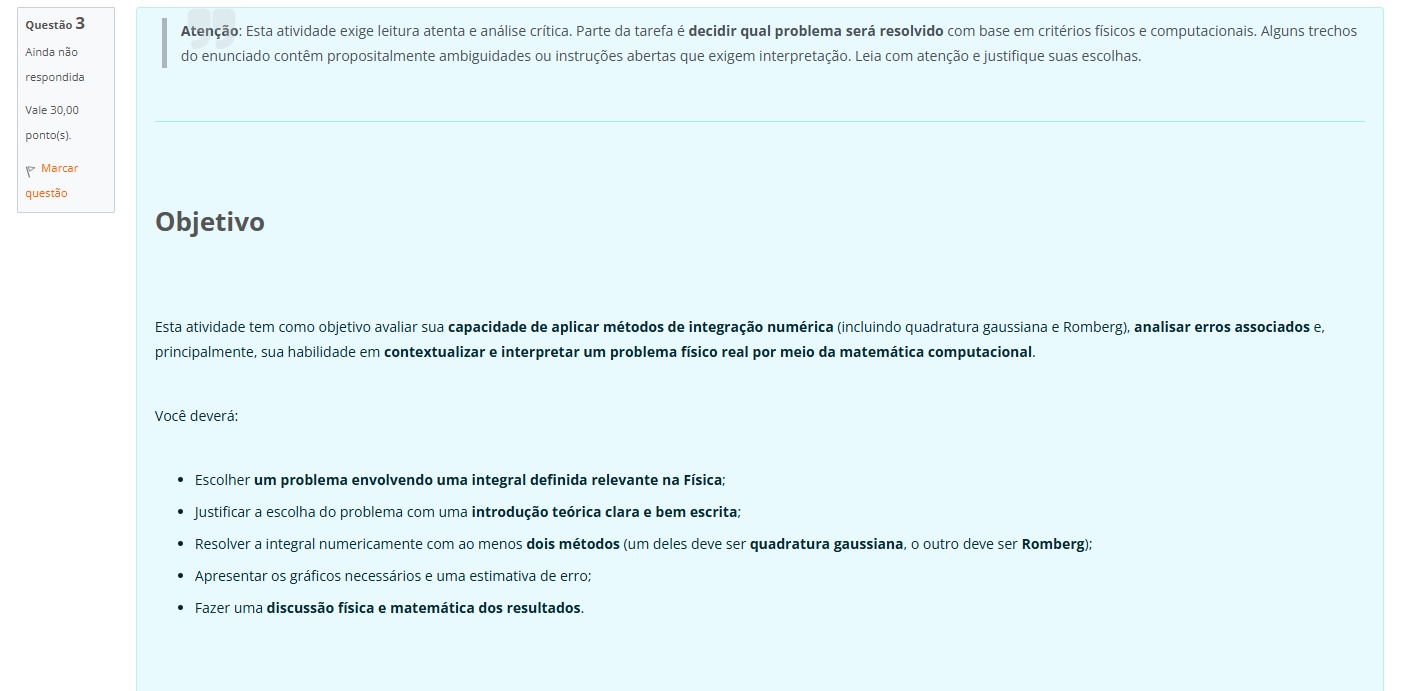

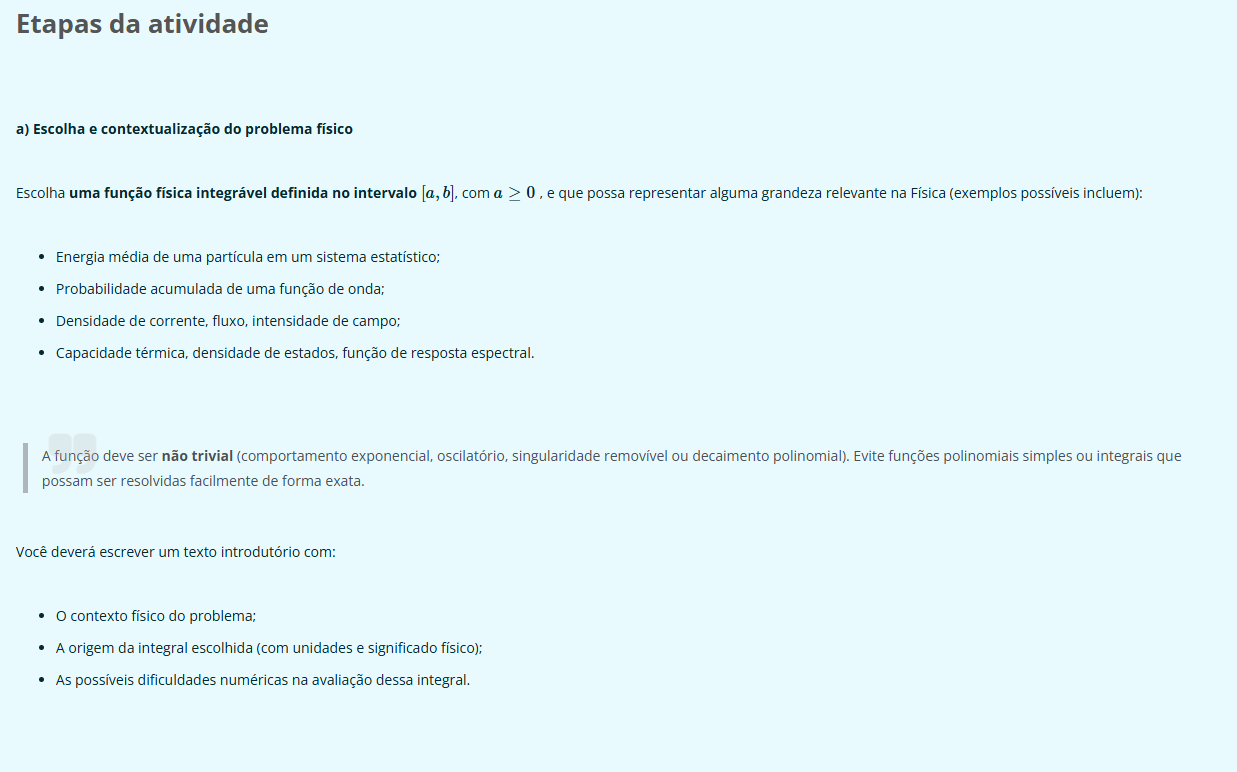

Problema: quantidade de √°gua que sai de uma garrafa furada

Imagine que voc√™ fez um pequeno furo no fundo de uma garrafa cheia de √°gua.
Logo que o furo √© aberto, a √°gua sai r√°pido. Com o tempo, a velocidade vai diminuindo porque a press√£o da √°gua diminui.

Podemos imaginar que a velocidade da sa√≠da diminui de forma exponencial (r√°pido no come√ßo, devagar no final), algo como:

velocidade
(
ùë°
)
=
ùë£
0
‚Äâ
ùëí
‚àí
ùë°
/
ùúè
velocidade(t)=v0‚Äãe‚àít/œÑ

ùë£
0
v0‚Äã = velocidade inicial da √°gua (logo que o furo √© feito)

ùúè
œÑ = tempo que caracteriza o ‚Äúritmo‚Äù da diminui√ß√£o

Para saber quanto de √°gua saiu entre o momento em que abrimos o furo (
ùë°
=
0
t=0) e um tempo 
ùëá
T, somamos (na Matem√°tica, integramos) todas as velocidades nesse intervalo:

volume
(
ùëá
)
=
‚à´
0
ùëá
ùë£
0
‚Äâ
ùëí
‚àí
ùë°
/
ùúè
‚Äâ
ùëë
ùë°
volume(T)=‚à´0T‚Äãv0‚Äãe‚àít/œÑdt

O resultado dessa conta √©:

volume
(
ùëá
)
=
ùë£
0
‚Äâ
ùúè
‚Äâ
(
1
‚àí
ùëí
‚àí
ùëá
/
ùúè
)
volume(T)=v0‚ÄãœÑ(1‚àíe‚àíT/œÑ)

O que isso significa, em palavras:

No come√ßo, a √°gua sai r√°pido, e a maior parte sai logo.

Depois, o fluxo vai diminuindo at√© quase parar.

O termo 
1
‚àí
ùëí
‚àí
ùëá
/
ùúè
1‚àíe‚àíT/œÑ mostra justamente como o escoamento vai ‚Äúdesacelerando‚Äù com o tempo.

Por que isso √© relevante:
Esse mesmo tipo de c√°lculo serve para v√°rias coisas: descarga de bateria, resfriamento de um objeto, decaimento de part√≠culas radioativas, todos s√£o casos em que algo diminui r√°pido no come√ßo e mais devagar depois.




Quais s√£o as poss√≠veis dificuldades num√©ricas na avalia√ß√£o dessa integral?

Mesmo essa conta sendo f√°cil no papel, o computador pode ‚Äúse atrapalhar‚Äù em dois casos:

Quando o tempo √© muito pequeno
Imagine que voc√™ quer saber quanta √°gua saiu depois de um tempo bem curtinho.
Nesse caso, o computador precisa fazer uma conta do tipo:

‚Äú1 menos um n√∫mero que √© quase 1‚Äù
Como os dois n√∫meros s√£o muito parecidos, ele pode acabar ‚Äúperdendo‚Äù parte da informa√ß√£o e o resultado ficar impreciso.

Quando o tempo √© muito grande
Se voc√™ espera muito tempo, o jato de √°gua j√° quase parou.
O computador tenta calcular um n√∫mero t√£o, t√£o pequeno que ele arredonda para zero.
Isso n√£o estraga a resposta final (porque zero √© praticamente certo), mas √© bom saber que acontece.

Se fizer a conta passo a passo
Ao inv√©s de usar a f√≥rmula pronta, se algu√©m tentar ‚Äúsomar pedacinhos‚Äù do volume saindo a cada instante, o computador pode precisar de muitos passos para acertar, principalmente quando a √°gua est√° caindo r√°pido no in√≠cio.

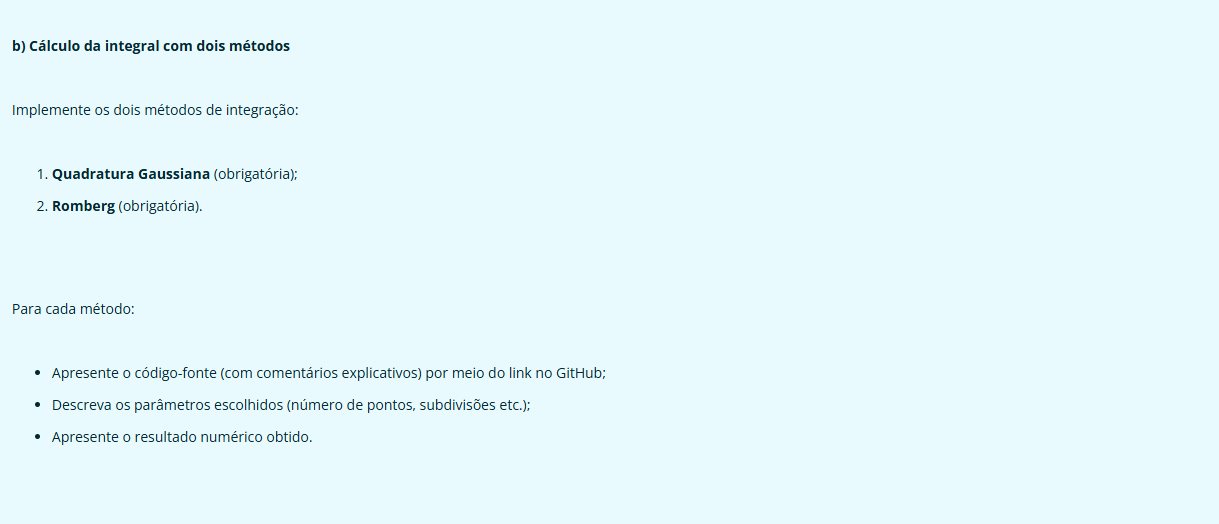

In [26]:
# -*- coding: utf-8 -*-
"""
Integra√ß√£o num√©rica de I(T) = ‚à´_0^T v0 * exp(-t/œÑ) dt
com dois m√©todos: Gauss-Legendre e Romberg.

Como executar:
    python integracao_exponencial.py

Sa√≠das:
- Tabela no console com aproxima√ß√µes e erros.
- Arquivo CSV com os resultados: resultados_integracao_exponencial.csv
"""

import math
from typing import Callable, List, Tuple

import numpy as np
import pandas as pd

# ---------- Problema ----------
def exact_volume(v0: float, tau: float, T: float) -> float:
    """
    Valor anal√≠tico da integral:
    I(T) = ‚à´_0^T v0 * exp(-t/œÑ) dt = v0 * œÑ * (1 - exp(-T/œÑ))
    """
    return v0 * tau * (1.0 - math.exp(-T / tau))

def integrand_factory(v0: float, tau: float) -> Callable[[float], float]:
    """Retorna f(t) = v0 * exp(-t/œÑ)."""
    return lambda t: v0 * math.exp(-t / tau)

# ---------- 1) Gauss-Legendre ----------
def gauss_legendre(f: Callable[[float], float], a: float, b: float, n: int) -> float:
    """
    Integra f em [a,b] via quadratura Gauss-Legendre de n pontos.
    - Usa n√≥s/pesos de Legendre em [-1,1] e faz mudan√ßa de vari√°vel para [a,b].
    """
    # N√≥s e pesos no intervalo [-1,1]
    x, w = np.polynomial.legendre.leggauss(n)
    # Mudan√ßa de vari√°vel para [a,b]
    mid = 0.5 * (a + b)
    half = 0.5 * (b - a)
    t = mid + half * x
    return float(half * np.dot(w, [f(tt) for tt in t]))

# ---------- 2) Romberg ----------
def romberg(f: Callable[[float], float], a: float, b: float, k: int) -> Tuple[float, List[List[float]]]:
    """
    Integra f em [a,b] via Romberg at√© a ordem k (constr√≥i uma tabela kxk).
    Retorna (aproxima√ß√£o final, tabela de Richardson).
    - R[i][0]: regra do trap√©zio com 2^i pain√©is (passo h_i).
    - Extrapola√ß√£o de Richardson: R[i][j] = R[i][j - 1] + (R[i][j - 1] - R[i - 1][j - 1]) / (4 ** j - 1).
    """
    R = [[0.0 for _ in range(k)] for _ in range(k)]
    h = b - a
    R[0][0] = 0.5 * h * (f(a) + f(b))
    for i in range(1, k):
        # Trap√©zios refinados: somamos f nos pontos m√©dios rec√©m-criados
        n_panels = 2 ** i
        h_i = (b - a) / n_panels
        m_max = 2 ** (i - 1)
        sum_new = 0.0
        for m in range(1, m_max + 1):
            x_m = a + (2 * m - 1) * h_i
            sum_new += f(x_m)
        R[i][0] = 0.5 * R[i - 1][0] + h_i * sum_new
        # Extrapola√ß√µes de Richardson
        for j in range(1, i + 1):
            R[i][j] = R[i][j - 1] + (R[i][j - 1] - R[i - 1][j - 1]) / (4 ** j - 1)
    return R[k - 1][k - 1], R

def main():
    v0 = 1.5
    tau = 3.0
    T = 10.0
    a, b = 0.0, T

    f = integrand_factory(v0, tau)
    I_exact = exact_volume(v0, tau, T)

    print("Par√¢metros: v0 = {:.6g}, tau = {:.6g}, T = {:.6g}".format(v0, tau, T))
    print("Valor exato: I(T) = {:.16e}".format(I_exact))
    print()

    # Gauss-Legendre para n = 1..8
    gauss_rows = []
    for n in range(1, 9):
        I_g = gauss_legendre(f, a, b, n)
        err = abs(I_g - I_exact)
        gauss_rows.append(("Gauss-Legendre", n, I_g, err))

    # Romberg para k = 1..6
    romberg_rows = []
    for k_ord in range(1, 7):
        I_r, _ = romberg(f, a, b, k_ord)
        err = abs(I_r - I_exact)
        romberg_rows.append(("Romberg", k_ord, I_r, err))

    # Consolida e imprime resultados
    import pandas as pd
    df = pd.DataFrame(
        gauss_rows + romberg_rows,
        columns=["Metodo", "n_ou_k", "Aproximacao", "ErroAbs"]
    ).sort_values(["Metodo", "n_ou_k"]).reset_index(drop=True)

    print(df.to_string(index=False))

    # Salva CSV
    df.to_csv("resultados_integracao_exponencial.csv", index=False)

if __name__ == "__main__":
    main()


Par√¢metros: v0 = 1.5, tau = 3, T = 10
Valor exato: I(T) = 4.3394670299373646e+00

        Metodo  n_ou_k  Aproximacao      ErroAbs
Gauss-Legendre       1     2.833134 1.506333e+00
Gauss-Legendre       2     4.249153 9.031452e-02
Gauss-Legendre       3     4.337369 2.097664e-03
Gauss-Legendre       4     4.339441 2.600238e-05
Gauss-Legendre       5     4.339467 2.004292e-07
Gauss-Legendre       6     4.339467 1.053331e-09
Gauss-Legendre       7     4.339467 4.015455e-12
Gauss-Legendre       8     4.339467 9.769963e-15
       Romberg       1     7.767555 3.428088e+00
       Romberg       2     4.477941 1.384740e-01
       Romberg       3     4.341681 2.214273e-03
       Romberg       4     4.339477 9.533514e-06
       Romberg       5     4.339467 1.042849e-08
       Romberg       6     4.339467 2.860823e-12


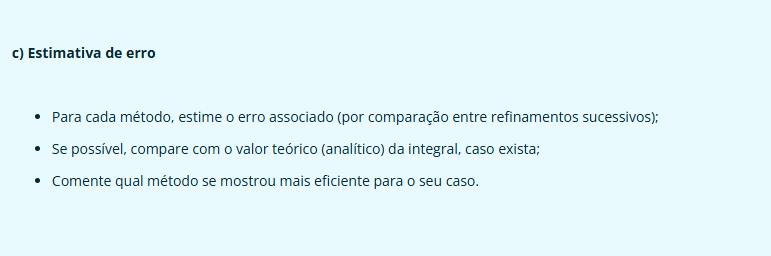

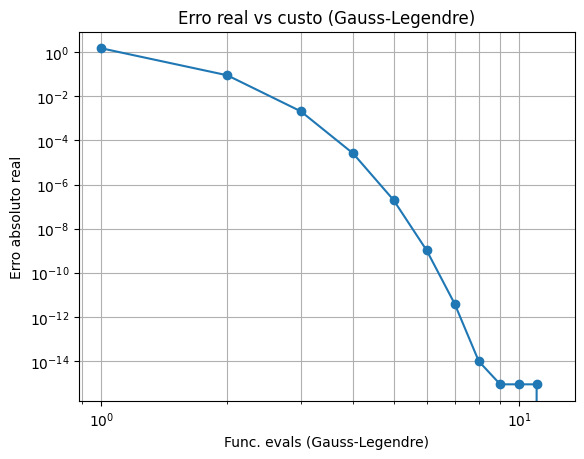

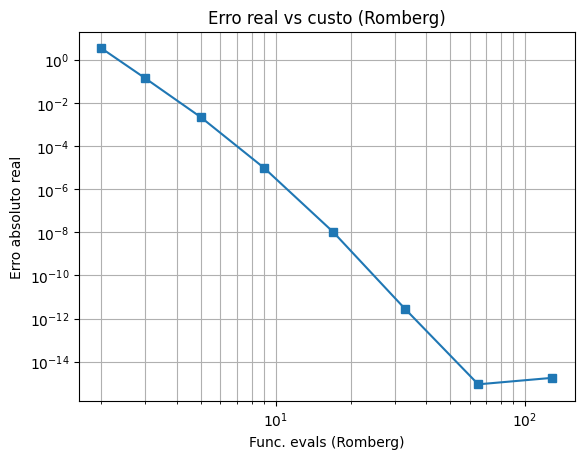

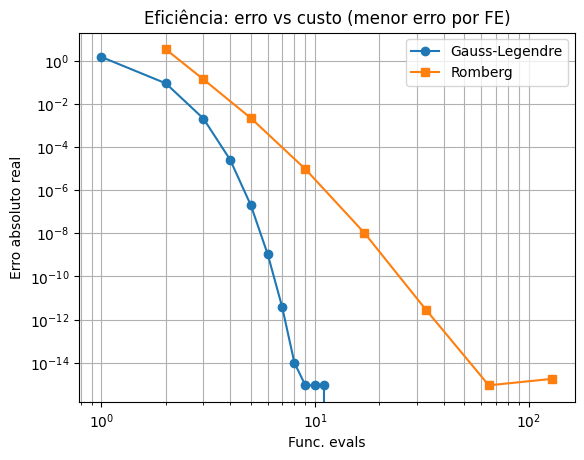

CSV consolidado com estimativas e custos: /mnt/data/estimativas_erro_integracao.csv
I_exato = 4.3394670299373646


In [23]:
# Estimativa de erro por refinamentos sucessivos + compara√ß√£o com erro real e custo (n√∫mero de avalia√ß√µes)
import math
from typing import Callable, List, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def exact_volume(v0: float, tau: float, T: float) -> float:
    return v0 * tau * (1.0 - math.exp(-T / tau))

def integrand_factory(v0: float, tau: float):
    return lambda t: v0 * math.exp(-t / tau)

def gauss_legendre(f, a, b, n: int) -> float:
    x, w = np.polynomial.legendre.leggauss(n)
    mid = 0.5 * (a + b)
    half = 0.5 * (b - a)
    t = mid + half * x
    return float(half * np.dot(w, [f(tt) for tt in t]))

def romberg(f, a, b, k: int):
    R = [[0.0 for _ in range(k)] for _ in range(k)]
    h = b - a
    R[0][0] = 0.5 * h * (f(a) + f(b))
    for i in range(1, k):
        n_panels = 2 ** i
        h_i = (b - a) / n_panels
        m_max = 2 ** (i - 1)
        sum_new = 0.0
        for m in range(1, m_max + 1):
            x_m = a + (2 * m - 1) * h_i
            sum_new += f(x_m)
        R[i][0] = 0.5 * R[i - 1][0] + h_i * sum_new
        for j in range(1, i + 1):
            R[i][j] = R[i][j - 1] + (R[i][j - 1] - R[i - 1][j - 1]) / (4 ** j - 1)
    return R[k - 1][k - 1], R

# Par√¢metros do problema
v0, tau, T = 1.5, 3.0, 10.0
a, b = 0.0, T
f = integrand_factory(v0, tau)
I_exact = exact_volume(v0, tau, T)

# ---------- Gauss-Legendre: sucessivos n ----------
gauss_rows = []
prev_I = None
for n in range(1, 13):  # amplia at√© 12 pontos para observar tend√™ncia
    I_n = gauss_legendre(f, a, b, n)
    err_true = abs(I_n - I_exact)
    err_succ = abs(I_n - prev_I) if prev_I is not None else None  # estimativa por refinamento
    fevals = n  # n pontos em uma √∫nica chamada
    gauss_rows.append(
        {
            "Metodo": "Gauss-Legendre",
            "Parametro": n,
            "Aproximacao": I_n,
            "ErroReal": err_true,
            "ErroSucessivo": err_succ,
            "FEvals": fevals,
            "ErroReal/FE": err_true / fevals,
        }
    )
    prev_I = I_n

# ---------- Romberg: sucessivos k ----------
romberg_rows = []
prev_I = None
for k in range(1, 9):  # amplia at√© ordem 8
    I_k, R = romberg(f, a, b, k)
    err_true = abs(I_k - I_exact)
    err_succ = abs(I_k - prev_I) if prev_I is not None else None
    fevals = 2**(k-1) + 1  # 2 endpoints + somat√≥rio dos novos pontos = 2^{k-1}+1
    romberg_rows.append(
        {
            "Metodo": "Romberg",
            "Parametro": k,
            "Aproximacao": I_k,
            "ErroReal": err_true,
            "ErroSucessivo": err_succ,
            "FEvals": fevals,
            "ErroReal/FE": err_true / fevals,
        }
    )
    prev_I = I_k

df_err = pd.DataFrame(gauss_rows + romberg_rows)

# Salva CSV consolidado
csv_path = "/mnt/data/estimativas_erro_integracao.csv"
df_err.to_csv(csv_path, index=False)

# --------- Gr√°ficos de efici√™ncia: ErroReal vs FE ---------
# (1) Curva para Gauss
g = df_err[df_err["Metodo"]=="Gauss-Legendre"]
plt.figure()
plt.loglog(g["FEvals"], g["ErroReal"], marker="o")
plt.xlabel("Func. evals (Gauss-Legendre)")
plt.ylabel("Erro absoluto real")
plt.title("Erro real vs custo (Gauss-Legendre)")
plt.grid(True, which="both")
plt.show()

# (2) Curva para Romberg
r = df_err[df_err["Metodo"]=="Romberg"]
plt.figure()
plt.loglog(r["FEvals"], r["ErroReal"], marker="s")
plt.xlabel("Func. evals (Romberg)")
plt.ylabel("Erro absoluto real")
plt.title("Erro real vs custo (Romberg)")
plt.grid(True, which="both")
plt.show()

# --------- Gr√°fico comparativo: melhor erro por custo ---------
# Para cada FE poss√≠vel em cada m√©todo, coletar menor erro observado
best_g = g.groupby("FEvals", as_index=False)["ErroReal"].min()
best_r = r.groupby("FEvals", as_index=False)["ErroReal"].min()

plt.figure()
plt.loglog(best_g["FEvals"], best_g["ErroReal"], marker="o", label="Gauss-Legendre")
plt.loglog(best_r["FEvals"], best_r["ErroReal"], marker="s", label="Romberg")
plt.xlabel("Func. evals")
plt.ylabel("Erro absoluto real")
plt.title("Efici√™ncia: erro vs custo (menor erro por FE)")
plt.grid(True, which="both")
plt.legend()
plt.show()

print("CSV consolidado com estimativas e custos:", csv_path)
print("I_exato =", I_exact)


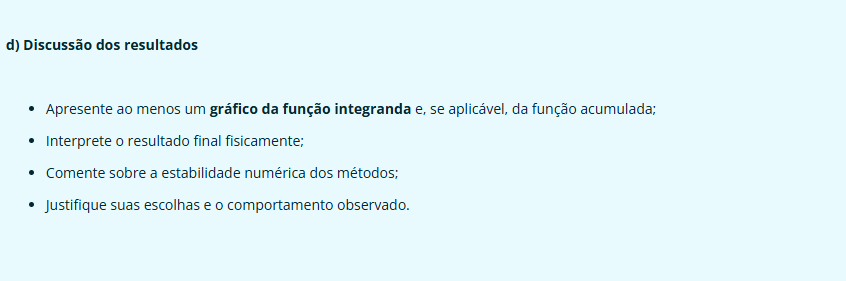

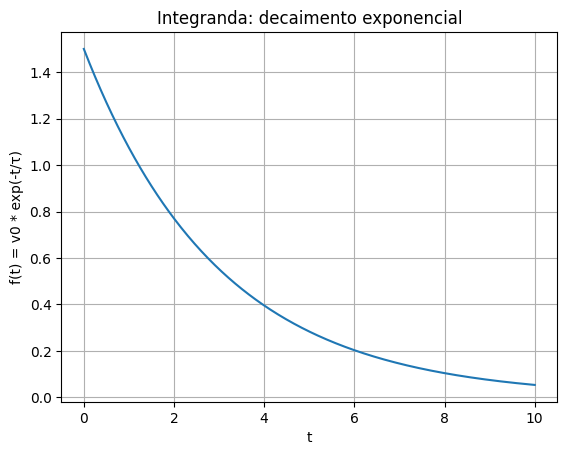

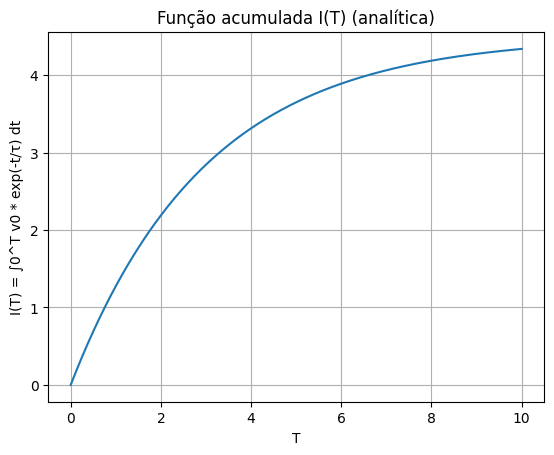

('/mnt/data/integranda_exponencial.png', '/mnt/data/acumulada_analitica.png')

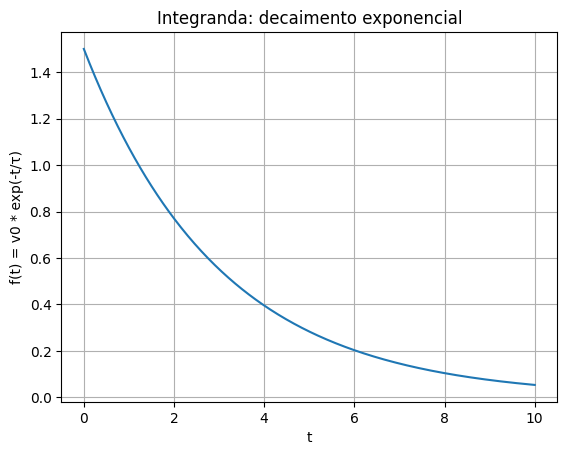

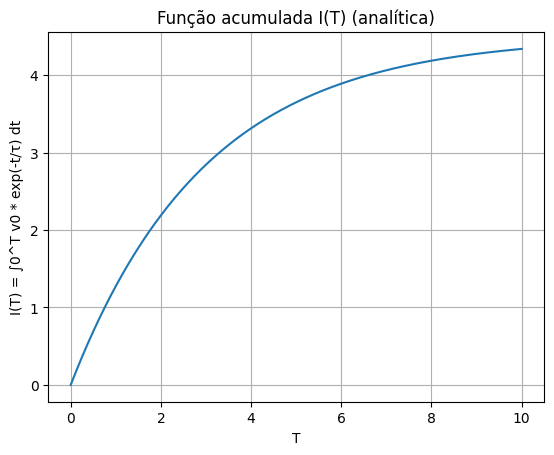

In [21]:

# Plota a fun√ß√£o integranda e a fun√ß√£o acumulada (anal√≠tica)
import numpy as np
import math
import matplotlib.pyplot as plt

# par√¢metros do problema
v0, tau = 1.5, 3.0
Tmax = 10.0  # mesmo T usado no experimento

def f(t):  # integranda
    return v0 * np.exp(-t / tau)

def I_exact(T):  # acumulada anal√≠tica
    return v0 * tau * (1.0 - np.exp(-T / tau))

# grade de pontos
t = np.linspace(0.0, Tmax, 400)

# (1) integranda
plt.figure()
plt.plot(t, f(t))
plt.xlabel("t")
plt.ylabel("f(t) = v0 * exp(-t/œÑ)")
plt.title("Integranda: decaimento exponencial")
plt.grid(True, which="both")
plt.show()

# (2) acumulada anal√≠tica
plt.figure()
plt.plot(t, I_exact(t))
plt.xlabel("T")
plt.ylabel("I(T) = ‚à´0^T v0 * exp(-t/œÑ) dt")
plt.title("Fun√ß√£o acumulada I(T) (anal√≠tica)")
plt.grid(True, which="both")
plt.show()

# salvar figuras
import os
fig1 = "/mnt/data/integranda_exponencial.png"
fig2 = "/mnt/data/acumulada_analitica.png"
# Para salvar, precisamos refazer rapidamente as figuras
plt.figure()
plt.plot(t, f(t))
plt.xlabel("t")
plt.ylabel("f(t) = v0 * exp(-t/œÑ)")
plt.title("Integranda: decaimento exponencial")
plt.grid(True, which="both")
plt.savefig(fig1, dpi=160, bbox_inches="tight")

plt.figure()
plt.plot(t, I_exact(t))
plt.xlabel("T")
plt.ylabel("I(T) = ‚à´0^T v0 * exp(-t/œÑ) dt")
plt.title("Fun√ß√£o acumulada I(T) (anal√≠tica)")
plt.grid(True, which="both")
plt.savefig(fig2, dpi=160, bbox_inches="tight")

fig1, fig2